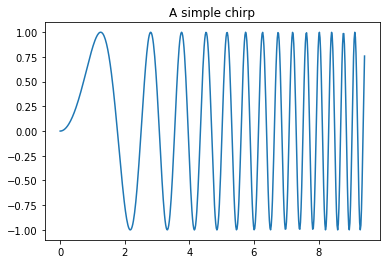

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

In [2]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

output_notebook()

show(p)

Loading BokehJS ...

In [6]:
import numpy as np
from scipy.integrate import odeint

from bokeh.plotting import figure, show, output_file, output_notebook

sigma = 10
rho = 28
beta = 8.0/3
theta = 3 * np.pi / 4

def lorenz(xyz, t):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta* z
    return [x_dot, y_dot, z_dot]

initial = (-10, -7, 35)
t = np.arange(0, 100, 0.006)

solution = odeint(lorenz, initial, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]
xprime = np.cos(theta) * x - np.sin(theta) * y

colors = ["#C6DBEF", "#9ECAE1", "#6BAED6", "#4292C6", "#2171B5", "#08519C", "#08306B",]

p = figure(title="lorenz example")

p.multi_line(np.array_split(xprime, 7), np.array_split(z, 7),
             line_color=colors, line_alpha=0.8, line_width=1.5)

output_notebook

show(p)  # open a browser

In [1]:
import numpy as np

from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.sampledata.les_mis import data

nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
            "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]

xname = []
yname = []
color = []
alpha = []
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

        if node1['group'] == node2['group']:
            color.append(colormap[node1['group']])
        else:
            color.append('lightgrey')

source = ColumnDataSource(data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=counts.flatten(),
))

p = figure(title="Les Mis Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names)), y_range=names)

p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None,
       hover_line_color='black', hover_color='colors')

p.select_one(HoverTool).tooltips = [
    ('names', '@yname, @xname'),
    ('count', '@count'),
]
p.sizing_mode = 'scale_width'
output_notebook(hide_banner=True)

show(p) # show the plot

Loading BokehJS ...

In [3]:
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.sampledata.periodic_table import elements

romans = ["I", "II", "III", "IV", "V", "VI", "VII"]

elements = elements.copy()
elements["atomic mass"] = elements["atomic mass"].astype(str)

elements["period"] = [romans[x-1] for x in elements.period]
elements = elements[elements.group != "-"]

group_range = [str(x) for x in range(1, 19)]

colormap = {
    "alkali metal"         : "#a6cee3",
    "alkaline earth metal" : "#1f78b4",
    "halogen"              : "#fdbf6f",
    "metal"                : "#b2df8a",
    "metalloid"            : "#33a02c",
    "noble gas"            : "#bbbb88",
    "nonmetal"             : "#baa2a6",
    "transition metal"     : "#e08e79",
}

source = ColumnDataSource(
    data=dict(
        group=[str(x) for x in elements["group"]],
        period=[str(y) for y in elements["period"]],
        symx=[str(x)+":0.1" for x in elements["group"]],
        numbery=[str(x)+":0.8" for x in elements["period"]],
        massy=[str(x)+":0.15" for x in elements["period"]],
        namey=[str(x)+":0.3" for x in elements["period"]],
        sym=elements["symbol"],
        name=elements["name"],
        cpk=elements["CPK"],
        atomic_number=elements["atomic number"],
        electronic=elements["electronic configuration"],
        mass=elements["atomic mass"],
        type=elements["metal"],
        type_color=[colormap[x] for x in elements["metal"]],
    )
)

p = figure(title="Periodic Table", tools="hover,save",
           x_range=group_range, y_range=list(reversed(romans)))
p.toolbar_location = None
p.outline_line_color = None


p.rect("group", "period", 0.9, 0.9, source=source,
       fill_alpha=0.6, color="type_color")

text_props = {
    "source": source,
    "angle": 0,
    "color": "black",
    "text_align": "left",
    "text_baseline": "middle"
}

p.text(x="symx", y="period", text="sym",
       text_font_style="bold", text_font_size="15pt", **text_props)

p.text(x="symx", y="numbery", text="atomic_number",
       text_font_size="9pt", **text_props)

p.text(x="symx", y="namey", text="name",
       text_font_size="6pt", **text_props)

p.text(x="symx", y="massy", text="mass",
       text_font_size="5pt", **text_props)

p.grid.grid_line_color = None

p.select_one(HoverTool).tooltips = [
    ("name", "@name"),
    ("atomic number", "@atomic_number"),
    ("type", "@type"),
    ("atomic mass", "@mass"),
    ("CPK color", "$color[hex, swatch]:cpk"),
    ("electronic configuration", "@electronic"),
]
p.sizing_mode = 'scale_width'
output_notebook(hide_banner=True)

show(p)  # Change to save(p) to save but not show the HTML file

In [2]:
!pip show jupyterlab

Name: jupyterlab
Version: 0.25.2
Summary: An alpha preview of the JupyterLab notebook server extension.
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: jupyterlab-launcher, notebook


In [4]:
!pip install jupyterlab --upgrade

    100% |████████████████████████████████| 3.9MB 159kB/s eta 0:00:01
Requirement already up-to-date: notebook>=4.3.1 in /opt/conda/lib/python3.6/site-packages (from jupyterlab)
Requirement already up-to-date: jupyter-core in /opt/conda/lib/python3.6/site-packages (from notebook>=4.3.1->jupyterlab)
Requirement already up-to-date: tornado>=4 in /opt/conda/lib/python3.6/site-packages (from notebook>=4.3.1->jupyterlab)
Requirement already up-to-date: nbconvert in /opt/conda/lib/python3.6/site-packages (from notebook>=4.3.1->jupyterlab)
Requirement already up-to-date: traitlets>=4.2.1 in /opt/conda/lib/python3.6/site-packages (from notebook>=4.3.1->jupyterlab)
Requirement already up-to-date: ipykernel in /opt/conda/lib/python3.6/site-packages (from notebook>=4.3.1->jupyterlab)
Requirement already up-to-date: nbformat in /opt/conda/lib/python3.6/site-packages (from notebook>=4.3.1->jupyterlab)
Requirement already up-to-date: jupyter-client in /opt/conda/lib/python3.6/site-packages (from not

In [2]:
json ="""{
  "width": 400,
  "height": 400,
  "data": [
    {
      "name": "table",
      "values": [12, 23, 47, 6, 52, 19],
      "transform": [{"type": "pie", "field": "data"}]
    }
  ],
  "scales": [
    {
      "name": "r",
      "type": "sqrt",
      "domain": {"data": "table", "field": "data"},
      "range": [20, 100]
    }
  ],
  "marks": [
    {
      "type": "arc",
      "from": {"data": "table"},
      "properties": {
        "enter": {
          "x": {"field": {"group": "width"}, "mult": 0.5},
          "y": {"field": {"group": "height"}, "mult": 0.5},
          "startAngle": {"field": "layout_start"},
          "endAngle": {"field": "layout_end"},
          "innerRadius": {"value": 20},
          "outerRadius": {"scale": "r", "field": "data"},
          "stroke": {"value": "#fff"}
        },
        "update": {
          "fill": {"value": "#ccc"}
        },
        "hover": {
          "fill": {"value": "pink"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "table"},
      "properties": {
        "enter": {
          "x": {"field": {"group": "width"}, "mult": 0.5},
          "y": {"field": {"group": "height"}, "mult": 0.5},
          "radius": {"scale": "r", "field": "data", "offset": 8},
          "theta": {"field": "layout_mid"},
          "fill": {"value": "#000"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "text": {"field": "data"}
        }
      }
    }
  ]
}"""

In [1]:
from altair import Chart, load_dataset

# load data as a pandas DataFrame
cars = load_dataset('cars')

c = Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

In [4]:
display(c)

<altair.VegaLite object>

In [2]:
from altair import *

In [3]:
enable_mime_rendering()